In [1]:
#Goal: Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. 
#Source: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
train=pd.read_csv('./data/Occupancy Project/datatraining.txt', sep=',')
test1=pd.read_csv('./data/Occupancy Project/datatest.txt', sep=',')
test2=pd.read_csv('./data/Occupancy Project/datatest2.txt', sep=',')
train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [2]:
test1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
test2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [4]:
#All the data imported properly. Lets check for null values
train.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
test1.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [6]:
test2.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [7]:
#No null values. Time for some training. I'm using the logistic regression model since I only have 2 classes for the target
#variable.
train=train.drop(columns=['date'])
test1=test1.drop(columns=['date'])
test2=test2.drop(columns=['date'])

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train.drop(columns=['Occupancy']),train['Occupancy'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
from sklearn.metrics import classification_report
from sklearn import metrics
pred = model.predict(test1.drop(columns=['Occupancy']))
fpr, tpr, thresholds = metrics.roc_curve(test1['Occupancy'], pred)
metrics.auc(fpr, tpr)

0.9794223491063421

In [10]:
pred = model.predict(test2.drop(columns=['Occupancy']))
fpr, tpr, thresholds = metrics.roc_curve(test2['Occupancy'], pred)
metrics.auc(fpr, tpr)

0.9717345013418172

In [11]:
#Using the A.U.C. metric, its easy to see the the model does a good job predicting occupany. Now to simplify the model

#Source: https://chrisalbon.com/machine_learning/logistic_regression/logistic_regression_with_l1_regularization/ with some
#changes made
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ntrain=sc.fit_transform(train)
ntrain=pd.DataFrame(ntrain, columns=train.columns)
ntrain['Occupancy']=train['Occupancy']
ntrain=ntrain.dropna()

ntest1=sc.fit_transform(test1)
ntest1=pd.DataFrame(ntest1, columns=test1.columns)
ntest1['Occupancy']=test1['Occupancy']
ntest1=ntest1.dropna()

ntest2=sc.fit_transform(test2)
ntest2=pd.DataFrame(ntest2, columns=test2.columns)
ntest2['Occupancy']=test2['Occupancy']
ntest2=ntest2.dropna()

In [12]:
#Source: https://chrisalbon.com/machine_learning/logistic_regression/logistic_regression_with_l1_regularization/ with some
#changes made
C = [10, 1, .1, .001]
for c in C:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(ntrain.drop(columns=['Occupancy']),ntrain['Occupancy'])
    print('C:', c)
    print('Coefficient of each feature:', model.coef_)
    

C: 10
Coefficient of each feature: [[-1.13168344  0.35118948  3.74521306  2.01226837 -0.61350487]]
C: 1
Coefficient of each feature: [[-1.18893236  0.          3.70493122  1.95422541 -0.24403046]]
C: 0.1
Coefficient of each feature: [[-0.88675538  0.          3.40529465  1.58172809 -0.06067667]]
C: 0.001
Coefficient of each feature: [[0.         0.         1.13535279 0.031747   0.        ]]


In [13]:
ntrain=train.drop(columns=['Humidity','HumidityRatio','Temperature','CO2'])
ntest1=test1.drop(columns=['Humidity','HumidityRatio','Temperature','CO2'])
ntest2=test2.drop(columns=['Humidity','HumidityRatio','Temperature','CO2'])
model.fit(ntrain.drop(columns=['Occupancy']),ntrain['Occupancy'])

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
pred = model.predict(ntest1.drop(columns=['Occupancy']))
fpr, tpr, thresholds = metrics.roc_curve(test1['Occupancy'], pred)
metrics.auc(fpr, tpr)

0.9829469079895672

In [15]:
pred = model.predict(ntest2.drop(columns=['Occupancy']))
fpr, tpr, thresholds = metrics.roc_curve(ntest2['Occupancy'], pred)
metrics.auc(fpr, tpr)

0.9765002220364157

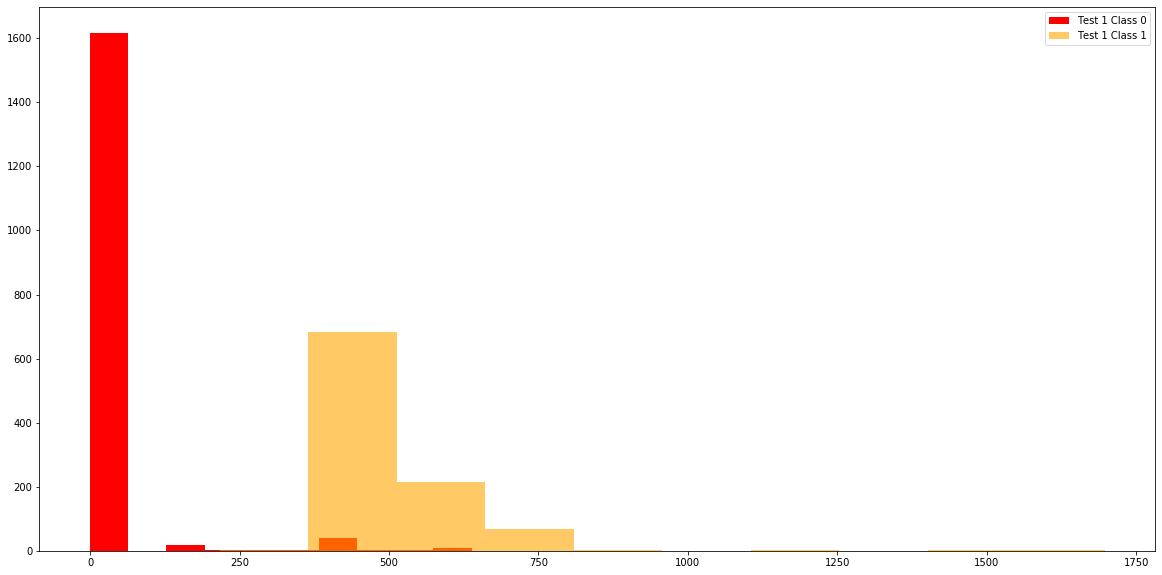

In [16]:
#Thanks to L1 regularization, we were able to cut the variables down to just one.
nt20=ntest2[ntest2['Occupancy']==0].Light
nt21=ntest2[ntest2['Occupancy']==1].Light
nt10=ntest1[ntest1['Occupancy']==0].Light
nt11=ntest1[ntest1['Occupancy']==1].Light
plt.figure(figsize=(20,10))
plt.hist(nt10, label='Test 1 Class 0', color='red')
plt.hist(nt11, label='Test 1 Class 1', color='orange',alpha=0.6)
plt.legend(loc=1)

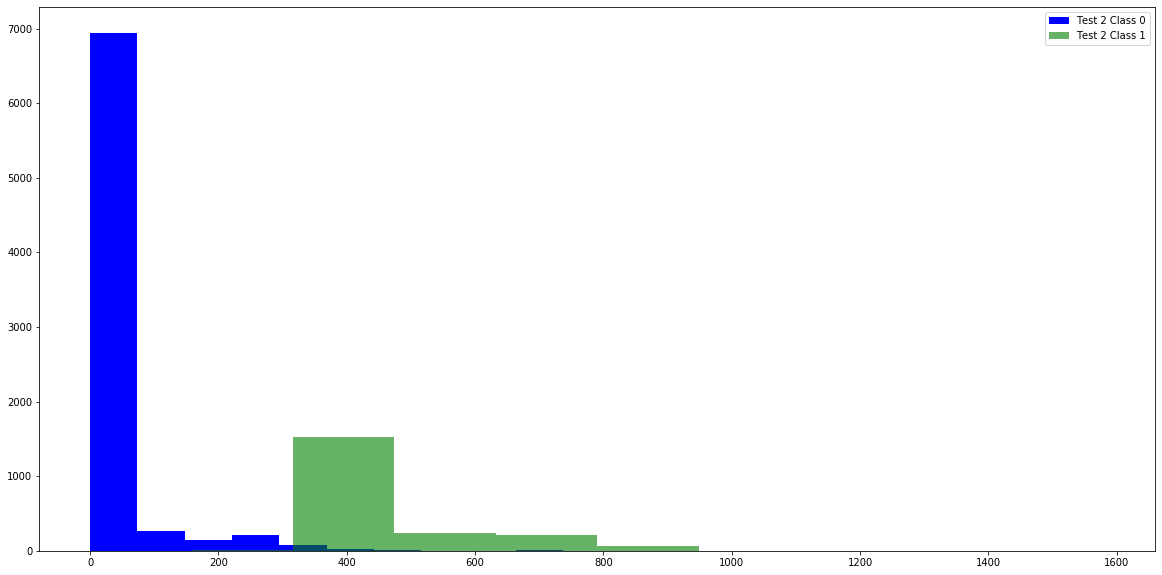

In [17]:
plt.figure(figsize=(20,10))
plt.hist(nt20, label='Test 2 Class 0', color='blue')
plt.hist(nt21, label='Test 2 Class 1', color='green', alpha=0.6)
plt.legend(loc=1)

In [18]:
#The histograms show that the data is linearly seperable which makes logistic regression perfect for this data.